In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import quad

In [12]:
def fourier_transform(i, print_opt=False):
    h = 0.05
    rho = 1000
    g =9.8
    gam = 0.072
    w = 140*(2*np.pi / 60)
    f0=1
    
    def g1(k):
        return k*np.tan(k*h)
    def g2(k):
        return -(w**2)/(g - (gam/rho)*k**2)
    
    def f1(k):
        return g1(k) - g2(k)
    m=i+1
    k_n = np.zeros(m-1)
    for n in range(1,m):
        k_n[n-1] = fsolve(f1, [n*np.pi/h -0.5,n*np.pi/h +0.5])[0]
    if print_opt ==True:
        print(k_n)
        print(f1(k_n))
    
    def chi(z,k,h):
        return np.cos(k*(z+h))/np.cos(k*h)
    
    def Int1(z,k,h):
        return chi(z,k,h)**2
    
    C_n = np.zeros(m-1)
    a_n_int = np.zeros(m-1)
    a_n  = np.zeros(m-1)
    for n in range(1,m):
        k= k_n[n-1]
        C_n[n-1], error = quad(Int1, -h,0, args = (k,h))
        a_n_int[n-1] , error = quad(chi,-h,0, args = (k,h))
        a_n[n-1] = (f0/((-k_n[n-1])*C_n[n-1]))*a_n_int[n-1]
    return a_n, k_n

In [50]:
a_n_vals, k_n_vals = fourier_transform(6,False)

In [52]:
print(a_n_vals)
print(k_n_vals)

[ 5.26956874e-03  5.42330526e-04  1.82817946e-04  1.03509167e-04
  9.58718956e-05 -1.11173568e-04]
[ 55.09898609 121.67241452 185.35603647 248.12708395 309.46510581
 387.18198832]


In [54]:
def chi(z,k,h):
    return np.cos(k*(z+h))/np.cos(k*h)

In [56]:
def chi_0(z,k,h):
    return np.cosh(k*(z+h))/np.cosh(k*h)

In [58]:
h=0.05
h = 0.05
rho = 1000
g =9.8
gam = 0.072
w = 140*(2*np.pi / 60)
f0=1
def h1(kap):
    return kap*np.tanh(kap*h)

def h2(kap):
    return (w**2)/(g+(gam/rho)*kap**2)

def f2(kap):
    return h1(kap) - h2(kap)
    
kappa = fsolve(f2, [0,40])[0]

C_0 = (1/(4*kappa*np.cosh(kappa*h)**2))*(2*kappa*h + np.sinh(2*kappa*h))

a_0 = (1/(1j)*(kappa**2)*(C_0))*(np.sinh(kappa*h)/np.cosh(kappa*h))
print(a_0)
print(kappa)

-13.071988179928903j
25.518180941458066


In [60]:
h= 0.05

In [62]:
def phi(x,z,h):
    return a_0*chi_0(z,kappa,h)*np.exp(1j*kappa*x) + a_n_vals[0]*chi(z,k_n_vals[0],h)*np.exp(-k_n_vals[0]*x) 
    + a_n_vals[1]*chi(z,k_n_vals[1],h)*np.exp(-k_n_vals[1]*x)  + a_n_vals[2]*chi(z,k_n_vals[2],h)*np.exp(-k_n_vals[2]*x)

C:\Users\nicol\anaconda3\Lib\site-packages\matplotlib\contour.py:1515: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = z.max().astype(float)
C:\Users\nicol\anaconda3\Lib\site-packages\matplotlib\contour.py:1516: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = z.min().astype(float)
C:\Users\nicol\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


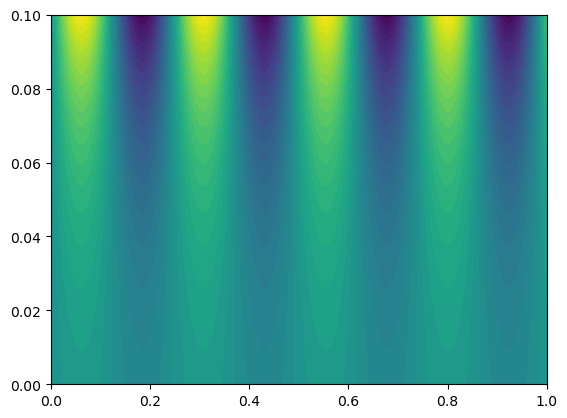

In [64]:
H=0.05
x_vals = np.linspace(0,1,1000)
z_vals = np.linspace(0,0.1,1000)
X, Z = np.meshgrid(x_vals, z_vals)
PHI = phi(X, Z, H)
plt.figure()
plt.contourf(X, Z, PHI, levels=50, cmap='viridis')
plt.savefig('velocity potential.jpg')

Text(0.5, 1.0, 'Function of a_n versus mode number b')

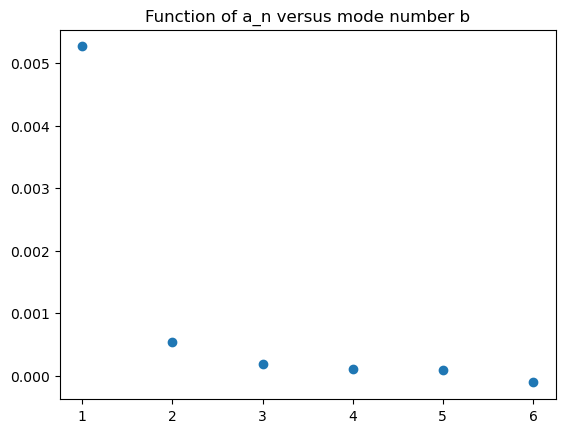

In [68]:
full_a_n_vals = [-13.071988179928903j ,0.00526957, 0.00054233, 0.00018282, 0.00010351]
n_vals = [1,2,3,4,5,6]

plt.scatter(n_vals, a_n_vals)
plt.title('Function of a_n versus mode number b')